In [1]:
#!python -m pip install backtrader

In [2]:
import backtrader as bt
import pandas as pd
import yfinance as yf
import numpy as np
import datetime
%matplotlib inline

In [3]:
cerebo=bt.Cerebro()

In [4]:
df=yf.download('AAPL',start='2010-01-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-12-31,7.611786,7.619643,7.520000,7.526071,6.415357,352410800
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200
...,...,...,...,...,...,...
2023-01-13,132.029999,134.919998,131.660004,134.759995,134.759995,57758000
2023-01-17,134.830002,137.289993,134.130005,135.940002,135.940002,63646600
2023-01-18,136.820007,138.610001,135.029999,135.210007,135.210007,69672800


In [6]:
feed=bt.feeds.PandasData(dataname=df)

In [7]:
cerebo.adddata(feed)

In [8]:
cerebo.run()

<IPython.core.display.Javascript object>


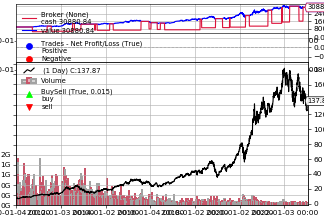

[[<Figure size 432x288 with 4 Axes>]]

In [9]:
cerebo.plot()

In [10]:
#define the trading Strategy
class SMACross(bt.Strategy):
    def __init__(self):
        sma1=bt.ind.SMA(period=50)# fast Moving average
        sma2=bt.ind.SMA(period=100)# slow Moving average
        self.crossover=bt.ind.CrossOver(sma1,sma2)# Crossover 
        
    def next(self):
        if not self.position:#not in the market
            if self.crossover>0:
                self.buy()#enter long
        elif self.crossover<0:
            self.close()#close long position

In [11]:
cerebo.addstrategy(SMACross)

1

In [12]:
cerebo.broker.setcommission(commission=0.005)

In [13]:
cerebo.addsizer(bt.sizers.PercentSizer,percents=50)

In [14]:
cerebo.addanalyzer(bt.analyzers.AnnualReturn,_name='areturn')

In [15]:
teststrat=cerebo.run()

<IPython.core.display.Javascript object>


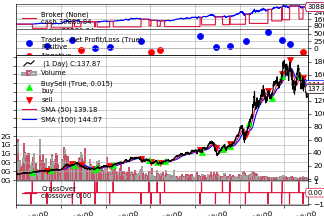

[[<Figure size 432x288 with 4 Axes>], [<Figure size 432x288 with 5 Axes>]]

In [16]:
cerebo.plot()

In [17]:
teststrat[0].analyzers.areturn.get_analysis()

OrderedDict([(2009, 0.0),
             (2010, 0.06772468644087026),
             (2011, 0.03246097891406752),
             (2012, 0.18553556062089882),
             (2013, 0.061742789480944804),
             (2014, 0.11600161859624114),
             (2015, -0.01762091328081683),
             (2016, -0.03929075007137739),
             (2017, 0.23874971399796063),
             (2018, 0.04834373025533267),
             (2019, 0.25283494928092454),
             (2020, 0.18236885143688863),
             (2021, 0.15258338972178875),
             (2022, -0.04702866839238362),
             (2023, 0.0)])